#### import libraries 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#### read and edit train data

In [29]:
df_train=pd.read_csv("../Data/House Price Prediction/train.csv")
df_train["date"] = pd.to_datetime(df_train["date"])
df_train["year"] = df_train["date"].dt.year
df_train["month"] = df_train["date"].dt.month
print(df_train.head)

<bound method NDFrame.head of               id       date     price  bedrooms  bathrooms  sqft_living  \
0     7129300520 2014-10-13  221900.0         3       1.00         1180   
1     6414100192 2014-12-09  538000.0         3       2.25         2570   
2     5631500400 2015-02-25  180000.0         2       1.00          770   
3     2487200875 2014-12-09  604000.0         4       3.00         1960   
4     1954400510 2015-02-18  510000.0         3       2.00         1680   
...          ...        ...       ...       ...        ...          ...   
9995   322059264 2014-09-26  279000.0         2       1.00         1020   
9996  5557500270 2015-02-09  262000.0         3       1.50         1700   
9997  9164100125 2014-08-07  533000.0         4       1.00         1550   
9998  7370600045 2015-04-02  640000.0         3       1.75         1680   
9999  8594400060 2014-06-09  285000.0         3       2.25         1680   

      sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_buil

#### set features and targets matrices for the train data

In [30]:
X_train = df_train.drop(['id', 'date', 'price', 'zipcode'],axis=1)
y_train = df_train['price']
y_log = np.log(y_train)

#### read and edit test data

In [31]:
df_test = pd.read_csv("../Data/House Price Prediction/test.csv")
df_test["date"] = pd.to_datetime(df_test["date"])
df_test["year"] = df_test["date"].dt.year
df_test["month"] = df_test["date"].dt.month

In [8]:
X_test = df_test.drop(['id', 'date', 'zipcode'],axis=1)

#### Concatinating X_train and X_test DataFrames

In [10]:
X_all = pd.concat([X_train , X_test])
print("Shapes of train data: ", X_train.shape, "test data: ", X_test.shape , "concatinated data", X_all.shape)

Shapes of train data:  (10000, 19) test data:  (11613, 19) concatinated data (21613, 19)


#### Working on Train Data #####

In [22]:
reg1 = lm.LinearRegression()
reg1.fit(X_train,y_log)
Pred1 = reg1.predict(X_train)
Pred1 = np.exp(Pred1)
print('Raw Data RMSE is:',round(mse(Pred1, y_train),2))
print('Raw Data R2 is:',round(r2_score(Pred1, y_train),2))

Raw Data RMSE is: 36028671564.09
Raw Data R2 is: 0.73


In [23]:
# Standard Scaler
scaleit = StandardScaler()
X_train1 = scaleit.fit_transform(X_train)
X_train1= pd.DataFrame(X_train1,columns=X_train.columns)

# 2nd Order Polynomial 
poly = PolynomialFeatures(2)
X_train2 = poly.fit_transform(X_train1)
polynames = poly.get_feature_names(X_train1.columns)
X_train2 = pd.DataFrame(X_train2,columns=polynames)

# Linear Regression of 2nd Order Polynomial of Scaled Date
reg2 = lm.LinearRegression()
reg2.fit(X_train2,y_log)
Pred2 = reg2.predict(X_train2)
Pred2 = np.exp(Pred2)
print('2nd Order PolyNomial of Standard Scaled RMSE is:',round(mse(y_train,Pred2),2))
print('2nd Order PolyNomial of Standard Scaled R2 is:',round(r2_score(y_train,Pred2),2))

2nd Order PolyNomial of Standard Scaled RMSE is: 23778679228.66
2nd Order PolyNomial of Standard Scaled R2 is: 0.83


#### Working on Test data

In [13]:
# Standard Scaler
scaleix=StandardScaler()
X_test1=scaleix.fit_transform(X_test)
X_test1=pd.DataFrame(X_test1,columns=X_test.columns)

# 2nd Order Polynomial Transformation
poly2 = PolynomialFeatures(2)
X_test2 = poly2.fit_transform(X_test1)
polynames2 = poly2.get_feature_names(X_test1.columns)
X_test2 = pd.DataFrame(X_test2, columns=polynames2)

#### Working on concatinated

In [14]:
# Standard Scaler
scaleia=StandardScaler()
X_all1=scaleia.fit_transform(X_all)
X_all1=pd.DataFrame(X_all1,columns=X_all.columns)


# 2nd Order Polynomial 
poly=PolynomialFeatures(2)
X_all2=poly.fit_transform(X_all1)
polynames=poly.get_feature_names(X_all1.columns)
X_all2=pd.DataFrame(X_all2,columns=polynames)

#### Dimension Reduction to n_components using t-SNE on scaled data

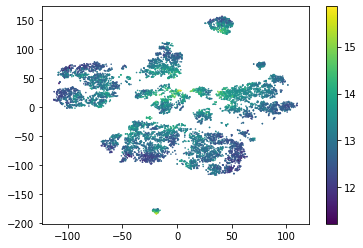

In [25]:
ncomp=2
mytsne_train1=TSNE(n_components=ncomp, n_iter=10000, perplexity=50)
X_tsne_train1=mytsne_train1.fit_transform(X_train1)
plt.scatter(X_tsne_train1[:,0],X_tsne_train1[:,1],s=0.3, c=y_log) 
plt.colorbar()
plt.show()

### Dimension Reduction to n_components using t-SNE

In [26]:
ncomp=2
mytsne_all1=TSNE(n_components=ncomp, n_iter=10000, perplexity=50)
X_tsne_all1=mytsne_all1.fit_transform(X_all1)

In [34]:
size_train = X_train1.shape[0]

X_train_tsne1 = X_tsne_all1[0:size_train,:]
X_test_tsne1  = X_tsne_all1[size_train:,:]

#### Linear Regression of 2nd Order Polynomial of Scaled Date with t-SNE Dimension Reduction

TSNE with  2  components RMSE is: 139217138759.72
TSNE with  2  components R2 is: 0.02


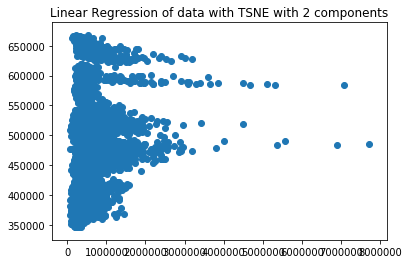

In [35]:
reg3 = lm.LinearRegression()
reg3.fit(X_train_tsne1,y_log)
Pred3 = reg3.predict(X_train_tsne1)
Pred3 = np.exp(Pred3)
print('TSNE with ',  ncomp, ' components RMSE is:',round(mse(y_train,Pred3),2))
print('TSNE with ',  ncomp, ' components R2 is:',round(r2_score(y_train,Pred3),2))

plt.plot(y_train,Pred3,'.')
plt.scatter(y_train,Pred3)
plt.title('Linear Regression of data with TSNE with ' + str(ncomp) + ' components')
plt.show()

#### Linear Regression of Scaled Data with TSNE Dimension Reduction on Test Data

In [36]:
pred4 = reg3.predict(X_test_tsne1)
df_test['price'] = np.exp(pred4)
#print('pred4 is: ', pred4)
#print(df_test.head(5))
df_test.to_csv('test_priced_TSNE2.csv')

In [38]:
X_train = df_train.drop(['id', 'date', 'price', 'zipcode', 'lat', 'long'],axis=1)
X_test = df_test.drop(['id', 'date', 'price', 'zipcode', 'lat', 'long'],axis=1)

In [39]:
X_all = pd.concat([X_train , X_test])

#### Scaling of test and train data 

In [41]:
# train data
scaleit = StandardScaler()
X_train1 = scaleit.fit_transform(X_train)
X_train1= pd.DataFrame(X_train1,columns=X_train.columns)
# test data
scaleix=StandardScaler()
X_test1=scaleix.fit_transform(X_test)
X_test1=pd.DataFrame(X_test1,columns=X_test.columns)
# concatinated data
scaleia=StandardScaler()
X_all1=scaleia.fit_transform(X_all)
X_all1=pd.DataFrame(X_all1,columns=X_all.columns)

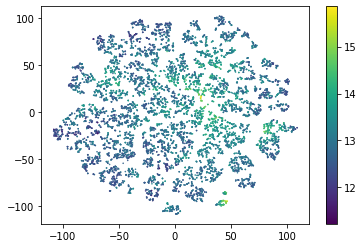

In [42]:
mytsne_train1=TSNE(n_components=2, n_iter=1000, perplexity=10)
X_tsne_train1=mytsne_train1.fit_transform(X_train1)
plt.scatter(X_tsne_train1[:,0],X_tsne_train1[:,1],s=0.3, c=y_log) 
plt.colorbar()
plt.show()

In [44]:
mytsne_all1=TSNE(n_components=2, n_iter=1000, perplexity=10)
X_tsne_all1=mytsne_all1.fit_transform(X_all1)

In [45]:
size_train = X_train1.shape[0]

X_train_tsne1 = X_tsne_all1[0:size_train,:]
X_test_tsne1  = X_tsne_all1[size_train:,:]

TSNE with  2  components RMSE is: 147366331559.6
TSNE with  2  components R2 is: -0.04


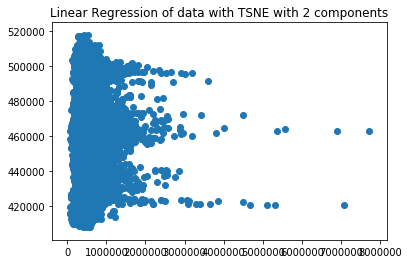

In [46]:
reg4 = lm.LinearRegression()
reg4.fit(X_train_tsne1,y_log)
Pred4 = reg4.predict(X_train_tsne1)
Pred4 = np.exp(Pred4)
print('TSNE with ',  ncomp, ' components RMSE is:',round(mse(y_train,Pred4),2))
print('TSNE with ',  ncomp, ' components R2 is:',round(r2_score(y_train,Pred4),2))

plt.plot(y_train,Pred4,'.')
plt.scatter(y_train,Pred4)
plt.title('Linear Regression of data with TSNE with ' + str(ncomp) + ' components')
plt.show()